<h1> Data Analysis with Python for Survival Analysis of Heart Patients </h1>

In [1]:
# import library

%matplotlib inline

import pandas as pd
import math
import numpy as np

import plotly.graph_objs as go
from matplotlib.pyplot import pie, axis
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.plotting import plot_confusion_matrix

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#import lightgbm
from sklearn.neighbors import NearestNeighbors
from xgboost import XGBClassifier


### 1. Data Acquistion

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Attribute Information:

Thirteen (13) clinical features: 

- age: age of the patient (years) 
- anaemia: decrease of red blood cells or hemoglobin (boolean) 
- high blood pressure: if the patient has hypertension (boolean) 
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L) 
- diabetes: if the patient has diabetes (boolean) 
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage) 
- platelets: platelets in the blood (kiloplatelets/mL) 
- sex: woman or man (binary) 
- serum creatinine: level of serum creatinine in the blood (mg/dL) 
- serum sodium: level of serum sodium in the blood (mEq/L) 
- smoking: if the patient smokes or not (boolean) 
- time: follow-up period (days) 
- [target] death event: if the patient deceased during the follow-up period (boolean) 

In [5]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

### 2. Data Analysis 

In [6]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


#### We are trying to perform binning based on age 

(array([37., 37., 39., 55., 46., 40., 19., 12.,  8.,  6.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

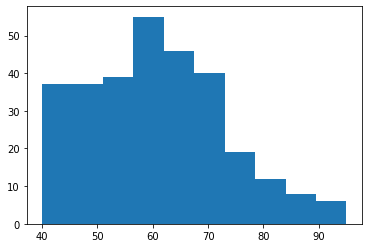

In [8]:
plt.hist(df['age'].values)

(array([74., 94., 86., 31., 14.]),
 array([40., 51., 62., 73., 84., 95.]),
 <BarContainer object of 5 artists>)

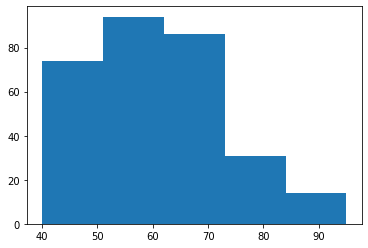

In [9]:
plt.hist(df['age'],bins=5)

(array([37., 37., 39., 55., 46., 40., 19., 12.,  8.,  6.]),
 array([40. , 45.5, 51. , 56.5, 62. , 67.5, 73. , 78.5, 84. , 89.5, 95. ]),
 <BarContainer object of 10 artists>)

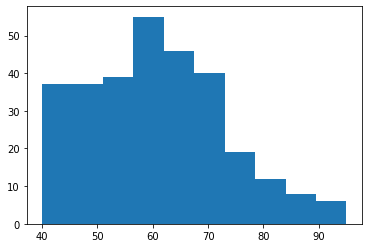

In [10]:
plt.hist(df['age'])

In [11]:
bins = np.linspace(min(df['age']), max(df['age']), 4 )
bins

array([40.        , 58.33333333, 76.66666667, 95.        ])

In [12]:
group_names = ['Ages: 40 to 58', 'Ages: 59 to 77', 'Ages: 77 and above']
group_names

['Ages: 40 to 58', 'Ages: 59 to 77', 'Ages: 77 and above']

In [13]:
df['age_groups'] = pd.cut(df['age'], bins, labels = group_names, include_lowest = True)
df[['age', 'age_groups']].head(10)

,age,age_groups
0,75.0,Ages: 59 to 77
1,55.0,Ages: 40 to 58
2,65.0,Ages: 59 to 77
3,50.0,Ages: 40 to 58
4,65.0,Ages: 59 to 77
5,90.0,Ages: 77 and above
6,75.0,Ages: 59 to 77
7,60.0,Ages: 59 to 77
8,65.0,Ages: 59 to 77
9,80.0,Ages: 77 and above


Text(0.5, 1.0, 'Age bar plot wrt counts')

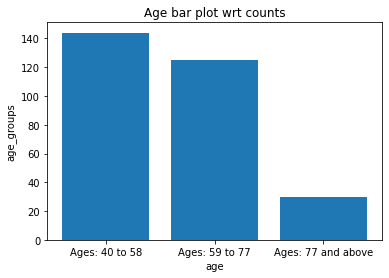

In [14]:
plt.bar(group_names, df['age_groups'].value_counts())
plt.xlabel('age')
plt.ylabel('age_groups')
plt.title('Age bar plot wrt counts')

- In General, age wise the age-groups btw 40 to 80 have higher chance of Heart Failure
- Within these two groups , 40 to 58 are having high likely chances of getting effect with heart failure


<AxesSubplot:xlabel='sex', ylabel='age'>

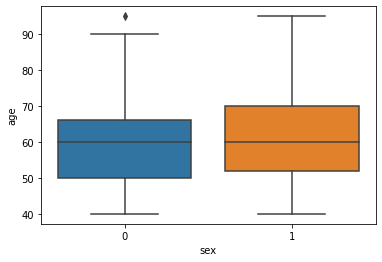

In [15]:
sns.boxplot(x='sex', y = 'age', data =df)

### Survival Analysis based on gender and death event

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


([<matplotlib.patches.Wedge at 0x7fd348bd21d0>,
 [Text(0.4388114916206487, 2.3595432767426963, 'Male_Survivors'),
  Text(-2.304070633891084, -0.6717577792930564, 'Male_Deaths'),
  Text(0.2642396098611334, -2.3854092790505437, 'Female_Survivors'),
  Text(2.2484790254931966, -0.8392508992650318, 'Female_Deaths')],
 [Text(0.40224386731892803, 2.162914670347472, '44%'),
  Text(-2.112064747733494, -0.6157779643519684, '21%'),
  Text(0.24221964237270563, -2.186625172462999, '24%'),
  Text(2.0611057733687637, -0.7693133243262793, '11%')])

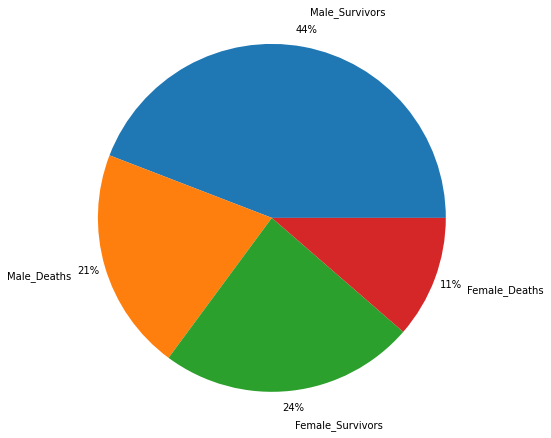

In [16]:
male = df[df['sex']==1]
female = df[df['sex']==0]

male_survivors = male[df['DEATH_EVENT']==0]
male_death = male[df['DEATH_EVENT']==1]

female_survivors = female[df['DEATH_EVENT']==0]
female_death = female[df['DEATH_EVENT']==1]

values = [len(male_survivors),len(male_death), len(female_survivors), len(female_death)]
labels = ['Male_Survivors','Male_Deaths','Female_Survivors', 'Female_Deaths']

# pie(values, radius = 2, startangle = 0, labels = labels , autopct = '%1.01f%%', pctdistance = 1.1, labeldistance = 1.2)

axis('equal')
pie(values, radius = 2, startangle=0, labels=labels, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)


In [17]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

#### Perform correlation analysis against between all variables and Death event

In [18]:
all_columns = df.columns.tolist()
all_columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'DEATH_EVENT',
 'age_groups']

In [19]:
del(all_columns[12])
all_columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time',
 'age_groups']

In [20]:
del(all_columns[12])
all_columns

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'time']

<class 'str'> age


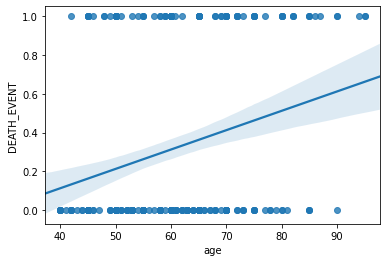

<class 'str'> anaemia


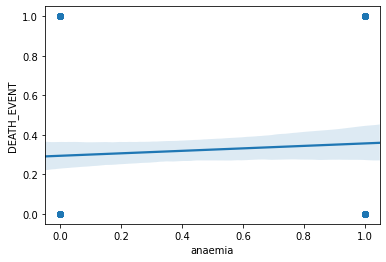

<class 'str'> creatinine_phosphokinase


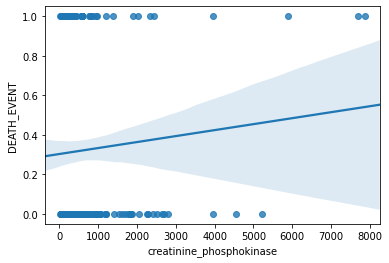

<class 'str'> diabetes


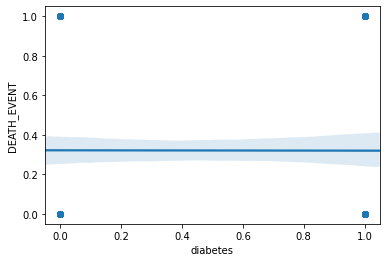

<class 'str'> ejection_fraction


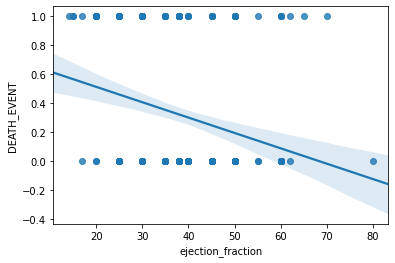

<class 'str'> high_blood_pressure


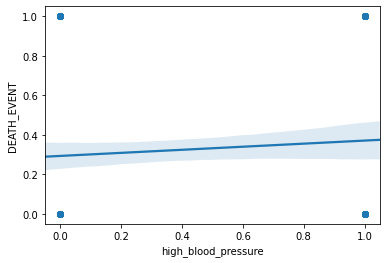

<class 'str'> platelets


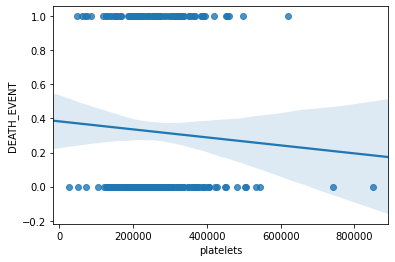

<class 'str'> serum_creatinine


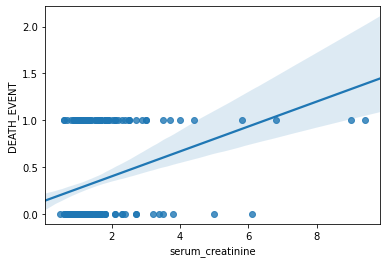

<class 'str'> serum_sodium


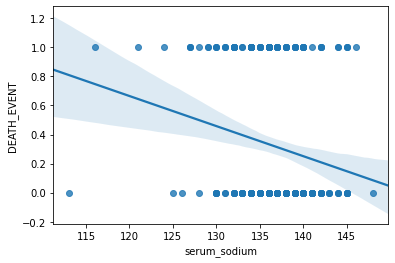

<class 'str'> sex


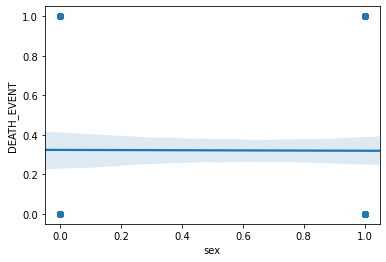

<class 'str'> smoking


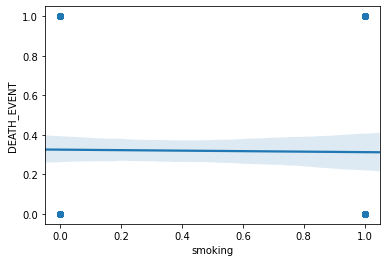

<class 'str'> time


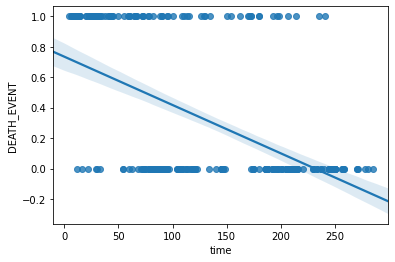

In [21]:
for i in all_columns:
    print(type(i), i)
    a = sns.regplot(x = i, y='DEATH_EVENT', data=df)
    plt.show(a)

##### Let's calculate Pearson Correlation Coefficient and P-value 

In [22]:
for j in all_columns:
    pearson_coeff, p_value = stats.pearsonr(df[j], df['DEATH_EVENT'])
    print('Pearson Correlation for ', j.upper() , ' and ', ' DEATH_EVENT are: ', pearson_coeff, ',', p_value)

Pearson Correlation for  AGE  and   DEATH_EVENT are:  0.2537285430880036 , 8.916762946531661e-06
Pearson Correlation for  ANAEMIA  and   DEATH_EVENT are:  0.06627009846028781 , 0.2532988145643253
Pearson Correlation for  CREATININE_PHOSPHOKINASE  and   DEATH_EVENT are:  0.06272816025237474 , 0.27961124573610285
Pearson Correlation for  DIABETES  and   DEATH_EVENT are:  -0.0019428833442034638 , 0.9733118267846151
Pearson Correlation for  EJECTION_FRACTION  and   DEATH_EVENT are:  -0.2686033123940619 , 2.4528974182084857e-06
Pearson Correlation for  HIGH_BLOOD_PRESSURE  and   DEATH_EVENT are:  0.07935105769128536 , 0.17114949852932787
Pearson Correlation for  PLATELETS  and   DEATH_EVENT are:  -0.04913886798037428 , 0.39719415404131725
Pearson Correlation for  SERUM_CREATININE  and   DEATH_EVENT are:  0.2942775609841492 , 2.1901978548976176e-07
Pearson Correlation for  SERUM_SODIUM  and   DEATH_EVENT are:  -0.19520359641640114 , 0.0006889112363762405
Pearson Correlation for  SEX  and   D

In [23]:
# Keggle.com. - solution of dataset

#### Ploting the heat Map

##### Heat Map cmap supported values are 
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 
'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 
'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 
'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 
'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper',
'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 
'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 
'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 
'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 
'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 
'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

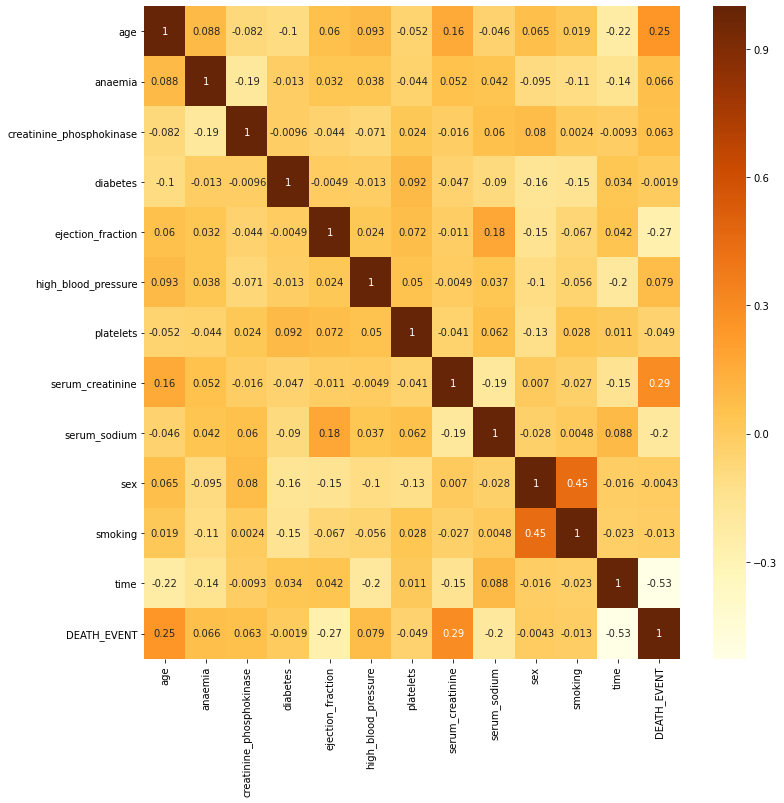

In [24]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(), cmap = 'YlOrBr', annot=True)
plt.show()

#### Based on the above heat map, we see that the top 4 contenders are 'time', 'age', 'serum_creatinine', 'ejection_fraction'

### Data Modeling

### Train Test Split the Dataset to feed the values into respective models 

In [25]:
Features = ['time', 'ejection_fraction', 'serum_creatinine', 'age']
x = df[Features]
y = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

### K-Nearest Neighbors Model

In [26]:
### K Nearest Neighnors classifier
accuracy_scores = []
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
knn_prediction = knn.predict(x_test)
knn_accuracy = knn.score(x_test,y_test)
accuracy_scores.append(knn_accuracy)

#### Check the Accuracy scores

In [27]:
print("Accuracy score of K-Nearest Neighbors classifier is : ",knn_accuracy)

Accuracy score of K-Nearest Neighbors classifier is :  0.9166666666666666


#### Confusion Matrix for KNN

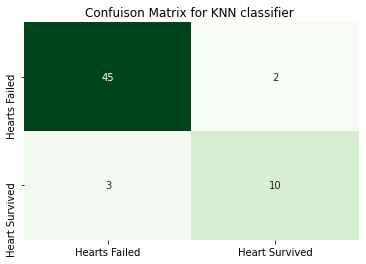

In [28]:
cm = confusion_matrix(y_test, knn_prediction)
#plt.figure(figsize=(12,12))
sns.heatmap(cm, cmap = 'Greens', annot = True, xticklabels= ['Hearts Failed', 'Heart Survived'] , \
            yticklabels = ['Hearts Failed', 'Heart Survived'], cbar = False )

plt.title('Confuison Matrix for KNN classifier ')
plt.show()

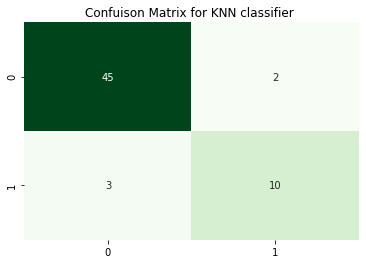

In [29]:
cm = confusion_matrix(y_test, knn_prediction)
#plt.figure(figsize=(12,12))
sns.heatmap(cm, cmap = 'Greens', annot = True, cbar = False )

plt.title('Confuison Matrix for KNN classifier ')
plt.show()

# X-axis - y_test , 
# Y-axis - KNN Prediction
# 0 - Failed
# 1 - Survived

### Decision Tree Classifier

In [30]:
#accuracy_scores = []
dtc = DecisionTreeClassifier(max_leaf_nodes=10, random_state = 30 , criterion = 'entropy' )
dtc.fit(x_train, y_train)
dtc_prediction = dtc.predict(x_test)
dtc_accuracy = dtc.score(x_test,y_test)
accuracy_scores.append(dtc_accuracy)

#### Check the Accuracy Score

In [31]:
print('', dtc_accuracy)


 0.9333333333333333


#### Confuison Matrix for Decision Tree Classifier

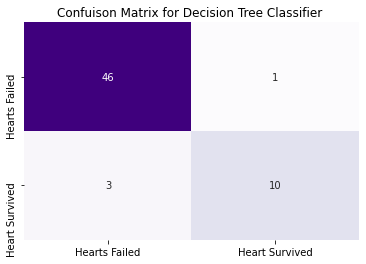

In [32]:
cm = confusion_matrix(y_test, dtc_prediction)
#plt.figure(figsize=(12,12))
sns.heatmap(cm, cmap = 'Purples', annot = True, xticklabels= ['Hearts Failed', 'Heart Survived'] , \
            yticklabels = ['Hearts Failed', 'Heart Survived'], cbar = False )

plt.title('Confuison Matrix for Decision Tree Classifier ')
plt.show()

### Random Forest Model

In [33]:
#accuracy_scores = []
rfc = RandomForestClassifier(max_features = 0.5, max_depth = 15, random_state = 1, n_estimators = 100)
rfc.fit(x_train, y_train)
rfc_prediction = rfc.predict(x_test)
rfc_accuracy = rfc.score(x_test,y_test)
accuracy_scores.append(rfc_accuracy)

# n_estimator max value is 100 , max_features - square root of fetaures 

#### Check the Accuracy Score

In [34]:
print('Accuracy score of Random Forest Classifier is : ', rfc_accuracy)

Accuracy score of Random Forest Classifier is :  0.9666666666666667


#### Confuison Matrix for Random Forest Model

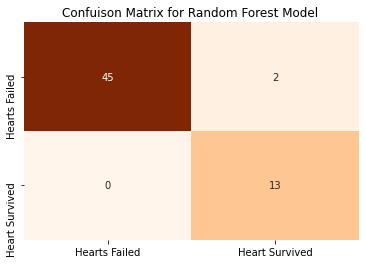

In [35]:
cm = confusion_matrix(y_test, rfc_prediction)
#plt.figure(figsize=(12,12))
sns.heatmap(cm, cmap = 'Oranges', annot = True, xticklabels= ['Hearts Failed', 'Heart Survived'] , \
            yticklabels = ['Hearts Failed', 'Heart Survived'], cbar = False )

plt.title('Confuison Matrix for Random Forest Model ')
plt.show()

In [36]:
#### KNN , Decision Tree Classifier , Random Forest Model - Article 

### Gradient Booster Classifier

In [37]:
gbc = GradientBoostingClassifier(max_depth=2, random_state=4)
gbc.fit(x_train, y_train)
gbc_prediction = gbc.predict(x_test)
gbc_accuracy = gbc.score(x_test,y_test)
accuracy_scores.append(gbc_accuracy)

#### Check the Accuracy Score

In [38]:
print("Accuracy score of Gradient Boosting Classifier is: ", gbc_accuracy)

Accuracy score of Gradient Boosting Classifier is:  0.95


#### Confusion Matrix for Random Forest Classifier

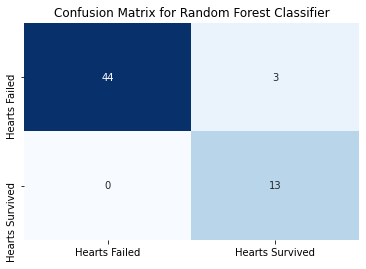

In [39]:
cm = confusion_matrix(y_test, gbc_prediction)
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=[ 'Hearts Failed','Hearts Survived'], \
            yticklabels= ['Hearts Failed', 'Hearts Survived'], cbar=False)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

#### XGBRFC Classifier

In [40]:
import xgboost

In [41]:
xgbc = xgboost.XGBClassifier()
xgbc.fit(x_train, y_train)
xgbc_prediction = xgbc.predict(x_test)
xgbc_accuracy = xgbc.score(x_test, y_test)
accuracy_scores.append(xgbc_accuracy)

Check the Accuracy Score

In [42]:
print("Accuracy score of XGBRFC Classifier is: ", xgbc_accuracy)

Accuracy score of XGBRFC Classifier is:  0.95


### Confusion Matrix for XGBRFC Classifier

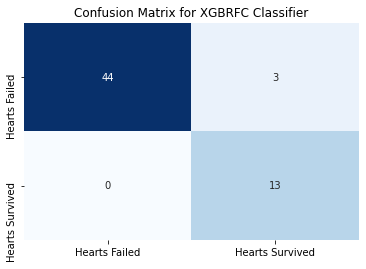

In [43]:
cm = confusion_matrix(y_test, xgbc_prediction)
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=[ 'Hearts Failed','Hearts Survived'], \
            yticklabels= ['Hearts Failed', 'Hearts Survived'], cbar=False)
plt.title('Confusion Matrix for XGBRFC Classifier')
plt.show()

### Model result visualizations

In [47]:
model_list = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest', 'Gradient Booster', 'XGBoost Classifier']

In [49]:
model_list

['K-Nearest Neighbors',
 'Decision Tree',
 'Random Forest',
 'Gradient Booster',
 'XGBoost Classifier']

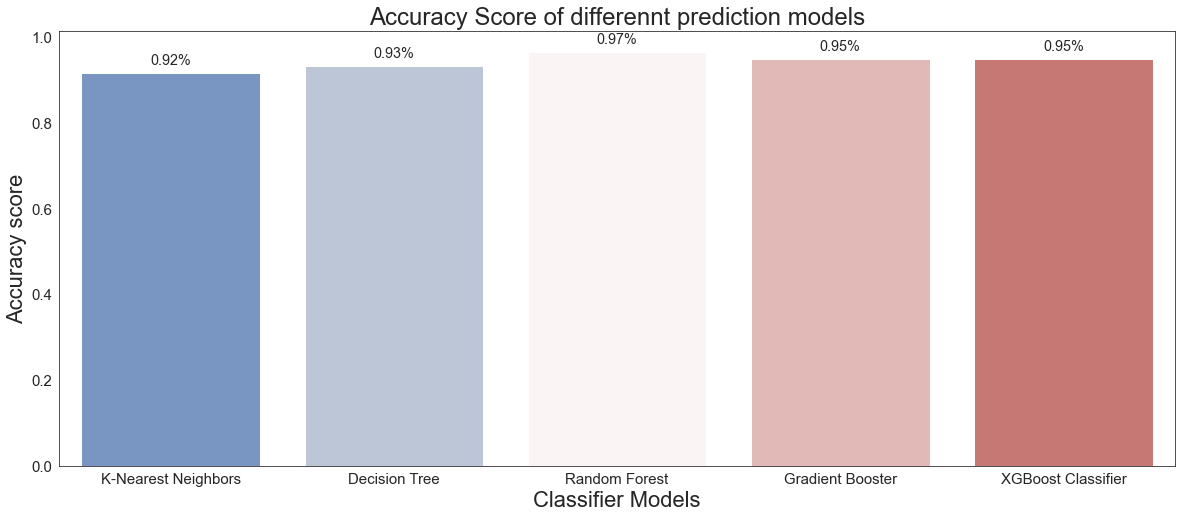

In [50]:
plt.rcParams['figure.figsize'] = 20,8 # For style sheets , rcParams are used
sns.set_style('white')
ax=sns.barplot(x = model_list, y = accuracy_scores, palette = 'vlag', saturation = 2.0)
plt.xlabel('Classifier Models', fontsize = 22)
plt.ylabel('Accuracy score', fontsize = 22)
plt.title('Accuracy Score of differennt prediction models', fontsize = 24)
plt.xticks(fontsize = 15, horizontalalignment = 'center')
plt.yticks(fontsize = 15)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height * 1.02), ha = 'center', fontsize = 'x-large')
plt.show()

Here are the observations from the visualization above,
- Random Forest Classifier has accuarcy score as : 97%  
- Gradient Booster has accuracy score as : 95%
- XGBoost Classifier has accuracy as : 95%
- Decision Tree Classifier has accuracy score as : 93%
- K-Nearest Neighbors has accuracy score as : 92%

Since Random Forest has higher accuracy, we are going to implement Random Forest for this Survival of Heart Failure Prediction problem.

## Random Forest - Decision Tree Classifier

#### This is an extension to Basic decision tree classifier, in this model we will combine multiple decision trees to achieve a stronger model. And the dervied model will be more effective and accurate. This model is also good at handling overfitting in a better way.

#### Random forest has both classifier and regression modules in it. The classifier model chooses to go with Majority voting while traveling between nodes and regression model calculates average to achieve the results.

#### Random Forest vs Naive Bayes
- Random Forest is a complex and large model when compared to the Naive Bayes
- Naive Bayes performs better with small datasets, while Random forest needs a large training data.

### Let's quickly evaluate the Results of Random Forest Model.

#### Correctly Predicted -> 97% (290 predictions are correct out of 299)
- True Positive -> 75% (45 predictions from 60 Out of sample Test set) -> Those who are predicted with Death event due to Heart failure and died.
- True Negative -> 3% ( 2 Predictions from 60 out of sample test set) -> Those who are predicted as Died even though when they survived.

#### Correctly Predicted -> 97% (290 predictions are correct out of 299)
- False Positive -> 0% There are no False positives; i.e., Those predictions where people are died and model predicts them as survived as zero.
- False Negative -> 22% ( 13 Predictions from 60 out of sample test set) -> Those who survived where rightly predicted as survived.
